In [1]:
# import library pandas untuk membuat data frame
import pandas as pd
df = pd.read_csv('emails.csv', encoding="ISO-8859-1")

In [2]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [3]:
# membagi data menjadi kalimat dalam email dan labelnya
from sklearn.model_selection import train_test_split
kalimat = df['text'].values
label = df['spam'].values
# membagi data menjadi data latih dan data test
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [4]:
# melihat contoh kalimat dalam email
print(kalimat_latih[0])
print('\n')
print(kalimat_test[0])

Subject: re : a request  duane ,  i shall be traveling for the rest of the week but my colleague  dr . zimin lu will call you to talk about different  structures .  vince  ds 64 @ cyrus . andrew . cmu . edu on 03 / 13 / 2001 09 : 54 : 24 am  to : " vince j kaminski "  cc :  subject : re : a request  vince ,  sorry that i missed your call yesterday . i have a meeting from 2 - 3 today  ( tuesday ) , but otherwise any time in the afternoon works for me . let me  know what is convenient for you . thanks for your help .  duane  * * * * * * * *  duane seppi  graduate school of industrial administration  carnegie mellon university  pittsburgh pa 15213 - 3890  tel . ( 412 ) 268 - 2298  fax ( 412 ) 268 - 8896  email ds 64 + @ andrew . cmu . edu


Subject: get the software you need , now !  save up to 40 % on popular software bundles !  last words are for people who haven ' t said anything in life .  human nature constitutes a part of the evidence in every case .


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# mengonversi setiap kata dalam sebuah kalimat ke bilangan tertentu (tokenisasi) 
tokenizer = Tokenizer(num_words=10000, oov_token='*', 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
                      split=' ', char_level=False)
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
# mengubah setiap kalimat dalam teks kita ke dalam sequence
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

In [6]:
# melihat kode angka untuk masing-masing kata
print(tokenizer.word_index)

{'*': 1, 'the': 2, 'to': 3, 'and': 4, 'of': 5, 'a': 6, 'you': 7, 'in': 8, 'i': 9, 'for': 10, 'enron': 11, 'on': 12, 'is': 13, 'ect': 14, "'": 15, 'subject': 16, 'this': 17, 'that': 18, 'your': 19, 'be': 20, 'with': 21, 'we': 22, 'vince': 23, 'will': 24, 'have': 25, 'at': 26, 'from': 27, 'it': 28, 'are': 29, 's': 30, 'as': 31, 'hou': 32, 'by': 33, 'com': 34, 'or': 35, 'if': 36, 'am': 37, 'please': 38, '2000': 39, 'kaminski': 40, 'not': 41, 'would': 42, 'me': 43, 'our': 44, 'can': 45, 're': 46, 'cc': 47, 'j': 48, 'my': 49, 'an': 50, '1': 51, 'pm': 52, '2001': 53, '2': 54, 'all': 55, 'any': 56, 'time': 57, 'research': 58, 'has': 59, '10': 60, 'do': 61, 'thanks': 62, 'know': 63, 'may': 64, '3': 65, 'about': 66, 'group': 67, 'information': 68, 'was': 69, 'new': 70, 'he': 71, 'e': 72, 'energy': 73, 'like': 74, 'more': 75, 'risk': 76, 'but': 77, 'one': 78, 'business': 79, 'get': 80, 'power': 81, '00': 82, 'email': 83, 'let': 84, 'up': 85, 'us': 86, 'so': 87, 'also': 88, '0': 89, 'what': 90, '

In [7]:
# melihat kalimat yang telah ditokenisasi
print(tokenizer.texts_to_sequences(kalimat_latih[0]))
print('\n')
print(tokenizer.texts_to_sequences(kalimat_test[0]))

[[30], [414], [314], [48], [72], [292], [102], [], [], [367], [72], [], [], [], [6], [], [367], [72], [2116], [414], [72], [30], [102], [], [], [184], [414], [6], [829], [72], [], [], [], [], [9], [], [30], [759], [6], [339], [339], [], [314], [72], [], [102], [367], [6], [524], [72], [339], [9], [829], [382], [], [781], [390], [367], [], [102], [759], [72], [], [367], [72], [30], [102], [], [390], [781], [], [102], [759], [72], [], [470], [72], [72], [584], [], [314], [414], [102], [], [125], [1324], [], [292], [390], [339], [339], [72], [6], [382], [414], [72], [], [], [184], [367], [], [], [], [2220], [9], [125], [9], [829], [], [339], [414], [], [470], [9], [339], [339], [], [292], [6], [339], [339], [], [1324], [390], [414], [], [102], [390], [], [102], [6], [339], [584], [], [6], [314], [390], [414], [102], [], [184], [9], [781], [781], [72], [367], [72], [829], [102], [], [], [30], [102], [367], [414], [292], [102], [414], [367], [72], [30], [], [], [], [], [524], [9], [829], [2

In [8]:
# menerapkan padding pada kalimat
padded_latih = pad_sequences(sekuens_latih,
                            padding='post',
                            maxlen=50,
                            truncating='post') 
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=50,
                            truncating='post')

In [9]:
# melihat contoh kalimat yang telah dipadding
print(padded_latih[0])
print('\n')
print(padded_test[0])

[  16   46    6  211 2861    9  216   20 2862   10    2 1427    5    2
  148   77   49 1925  407  371  578   24  130    7    3  340   66  483
 2319   23 3691 1926 7560 1673 2089  110   12  140  379   53  164 1182
  315   37    3   23   48   40   47   16]


[  16   80    2  261    7   94  139  566   85    3  561   12 3290  261
    1  196 1812   29   10  198  144 1490   15  102  359  723    8  477
 1878 2638 3926    6  376    5    2 5388    8  606  391    0    0    0
    0    0    0    0    0    0    0    0]


In [10]:
# membuat model machine learningnya
import tensorflow as tf
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
  # menerapkan embedding
  tf.keras.layers.Embedding(10000, 64), 
  # menggunakan 2 layer bidirectional LSTM
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu',
                        kernel_regularizer=regularizers.l2(0.00001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu',
                        kernel_regularizer=regularizers.l2(0.00001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
# menerapkan dropout dan fungsi regularizers

In [11]:
# menggunakan optimizer RMSProp
from tensorflow.keras.optimizers import RMSprop
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(
                  learning_rate=0.0001, rho=0.8, momentum=0.0, epsilon=1e-07, centered=True,
                  name='RMSprop'
              ),
              metrics=['accuracy'])

In [12]:
# menerapkan callback saat akurasi telah mencapai 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
# pengujian model
num_epochs = 100
history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size=512,
                    callbacks=[callbacks], validation_data=(padded_test, label_test), verbose=2)

Epoch 1/100
9/9 - 7s - loss: 0.8586 - accuracy: 0.7302 - val_loss: 0.8425 - val_accuracy: 0.7469
Epoch 2/100
9/9 - 6s - loss: 0.8320 - accuracy: 0.7647 - val_loss: 0.7953 - val_accuracy: 0.7469
Epoch 3/100
9/9 - 6s - loss: 0.7514 - accuracy: 0.7647 - val_loss: 0.7097 - val_accuracy: 0.7469
Epoch 4/100
9/9 - 6s - loss: 0.7032 - accuracy: 0.7647 - val_loss: 0.6999 - val_accuracy: 0.7469
Epoch 5/100
9/9 - 6s - loss: 0.6994 - accuracy: 0.7647 - val_loss: 0.6987 - val_accuracy: 0.7469
Epoch 6/100
9/9 - 6s - loss: 0.6986 - accuracy: 0.7647 - val_loss: 0.6979 - val_accuracy: 0.7469
Epoch 7/100
9/9 - 6s - loss: 0.6971 - accuracy: 0.7647 - val_loss: 0.6935 - val_accuracy: 0.7469
Epoch 8/100
9/9 - 6s - loss: 0.6889 - accuracy: 0.7647 - val_loss: 0.6805 - val_accuracy: 0.7469
Epoch 9/100
9/9 - 6s - loss: 0.6750 - accuracy: 0.7647 - val_loss: 0.6627 - val_accuracy: 0.7976
Epoch 10/100
9/9 - 6s - loss: 0.6611 - accuracy: 0.8215 - val_loss: 0.6519 - val_accuracy: 0.9223
Epoch 11/100

Akurasi telah m

In [14]:
import matplotlib.pyplot as plt

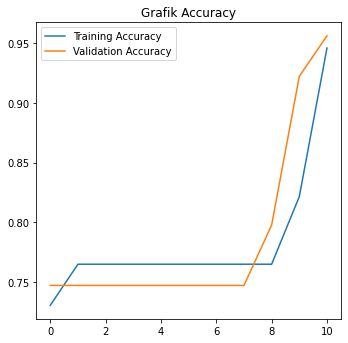

In [15]:
# membuat plot akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 3)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Grafik Accuracy')
plt.show()

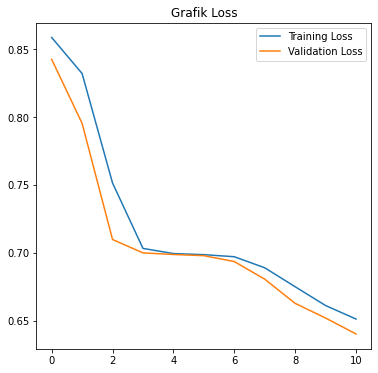

In [16]:
# membuat plot loss
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Grafik Loss')
plt.show()